---
title: "Topics in Econometrics and Data Science: Tutorial 8"

---

#### General Note

You will very likely find the solution to these exercises online. We, however, strongly encourage you to work on these exercises without doing so. Understanding someone else’s solution is very different from coming up with your own. Use the lecture notes and try to solve the exercises independently.

## Exercise 1: Logistic Regression

Load the `classification_1` dataset. The data consist of two features and a classification variable.

### **A)** 
How many different classes are contained in the dataset? (Hint: `help(pd.unique)`)

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('../../data/classification_1.csv', sep=';', na_values=".")
print(data.head())

     length    height  class
0  0.302402  0.896238    0.0
1 -0.385983  0.487310    1.0
2  0.190209  0.113254    1.0
3  1.714572 -0.110330    1.0
4  1.967063 -0.515801    1.0


In [3]:
data.shape

(500, 3)

In [4]:
print(data['class'].unique())
#help(set)
print(set(pd.DataFrame(data, columns=['class']).values.flatten()))

[0. 1.]
{0.0, 1.0}


### **B)**
Use logistic regression to separate both classes and measure the error rate on the training set. 
Follow these steps:

1. *Preprocessing*: Select X columns `length` and `height` and save as numpy array using the attribute `values`. Select Y column `class`, save as numpy array. and `flatten` into one-dimensional array.

2. *Logistic Regression*: Use [`linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to create a logistic regression classifier with specific parameters `penalty` and `solver`.

3. *Train model*: Learn the coefficients that best separate the classes using [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit).

4. *Predict class*: Use the trained model to make predictions on X with [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) and return predicted class labels for each input sample.

5. *Error rate*: Calculate the misclassification rate of the model.

In [5]:
from sklearn.linear_model import LogisticRegression

# Preprocessing
X = pd.DataFrame(data, columns=['length','height'])
X = X.values
y = pd.DataFrame(data, columns=['class'])
y = y.values
y = y.flatten()

# Logistic Regression
logisticRegr = LogisticRegression(penalty = 'l2', solver = 'liblinear')

# Train model 
model = logisticRegr.fit(X, y)

# Predict class
y_score = model.predict(X)

# Error rate
print('Error rate:', np.mean(np.not_equal(y_score,y)))

Error rate: 0.134


In [6]:
# Alternatively
print('Error rate:', np.mean(np.array(y_score != y)))

Error rate: 0.134


### **C)** 
Visualize the data with [`matplotlib`](https://matplotlib.org/). 

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Plot configuration
plot_symbol_size = 50
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

1. Create a basic scatter plot using just the `length` and `height` features.

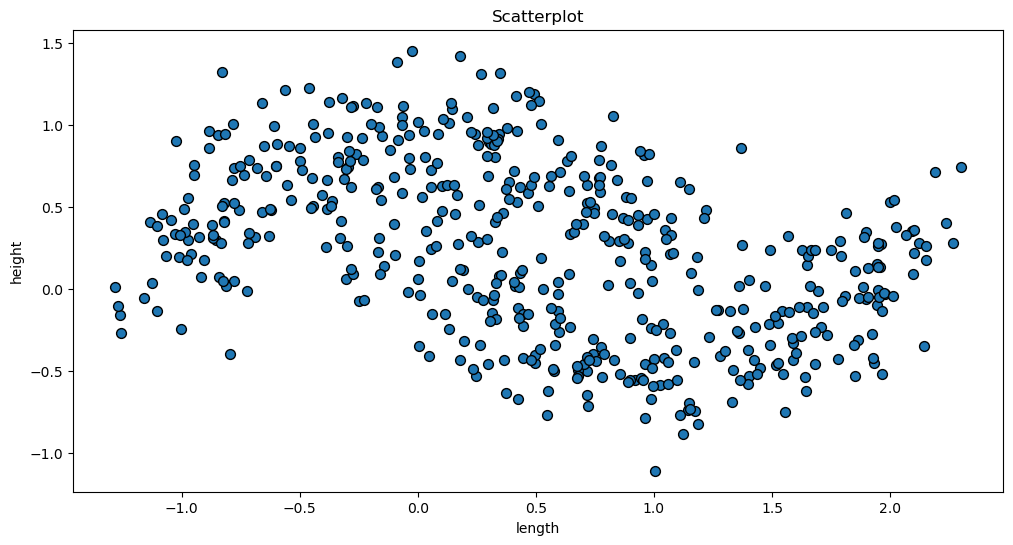

In [8]:
# Create scatter plot 
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, edgecolor = 'black')
# Labels, title, legend
plt.xlabel("length")
plt.ylabel("height")
plt.title("Scatterplot")
plt.show()

2. Add `class` to define colors of the scatterplot. Use the ListedColormap with red and blue colors to distinguish between your two classes.

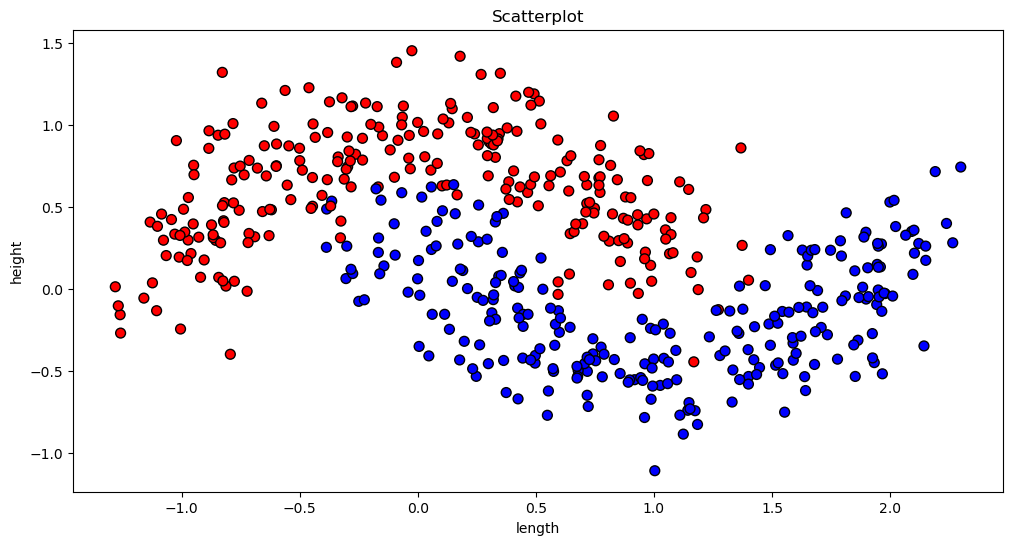

In [9]:
# Create scatter plot 
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
# Labels, title, legend
plt.xlabel("length")
plt.ylabel("height")
plt.title("Scatterplot")
plt.show()

3. Add a legend by creating red and blue patches with [`mpatches.Patch`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html) that explain which color corresponds to which class (Y=0 or Y=1).

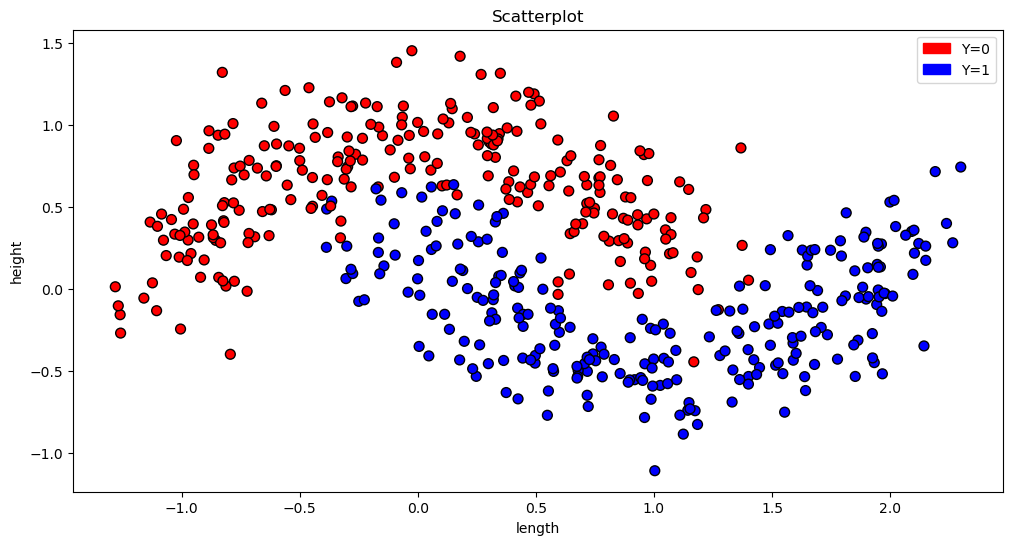

In [10]:
# Create scatter plot 
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
# Labels, title, legend
plt.xlabel("length")
plt.ylabel("height")
plt.title("Scatterplot")
# Add colored patches
patch0 = mpatches.Patch(color='#FF0000', label='Y=0')
patch1 = mpatches.Patch(color='#0000FF', label='Y=1')
plt.legend(handles=[patch0, patch1])
plt.show()

### **D)**
Can you explain the results from the logistic regression? Color the regions of the plot according to their predictions.

1. Create two color maps: one light (for decision boundary background) and one bold (for actual points).

In [14]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

2. Calculate the mesh grid for the decision boundary by finding min/max values of the features and creating a fine mesh grid with step size 0.01 using [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).\
**Hint**: `xx, yy = np.meshgrid(np.arange(x_min, x_max, stepsize), np.arange(y_min, y_max, stepsize))`

In [12]:
# Plot the decision boundary by assigning a color in the color map to each mesh point.
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))

3. Use your trained model to predict classes for each point in the mesh grid using `.predict()` on your model from **B)**.\
**Hint**: Use `np.c_[xx.ravel(), yy.ravel()]` to pass arrays in the right shape to the `.predict()` function, where `xx`and `yy` are the 2D arrays created by `np.meshgrid`.

In [13]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

4. Plot the decision boundary visualization by using [`pcolormesh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh) to create the colored background.

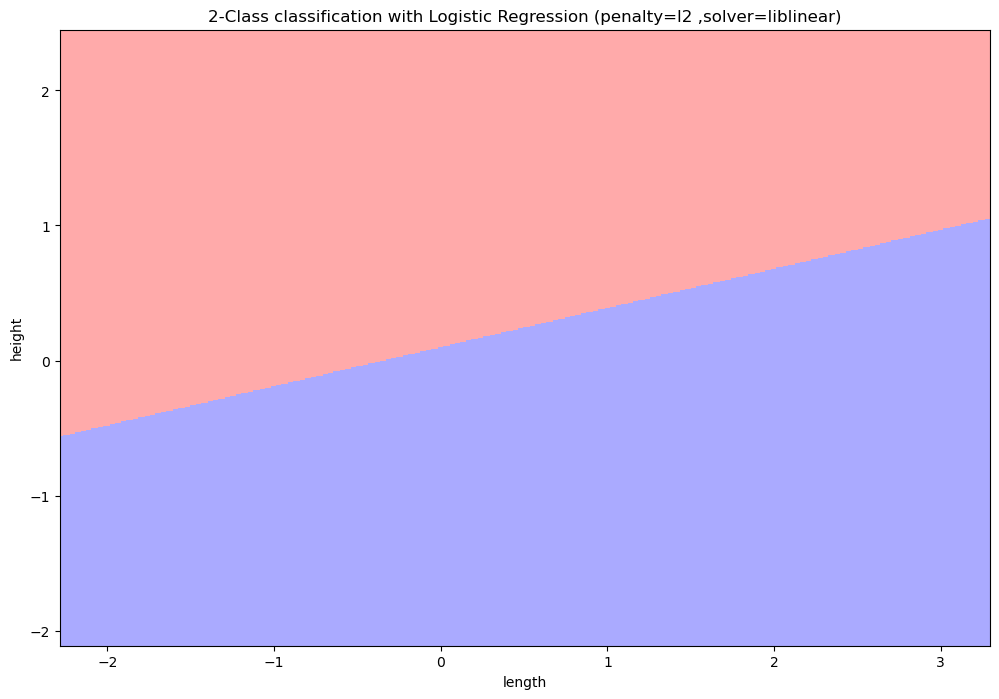

In [15]:
pen = 'l2'
solv = 'liblinear'

# Put the result into a color plot
plt.figure(3,figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.xlabel('length')
plt.ylabel('height')
plt.title("2-Class classification with Logistic Regression (penalty=%s ,solver=%s)" % (pen, solv))    
plt.show()

5. Add the actual data points on top using a scatter plot.

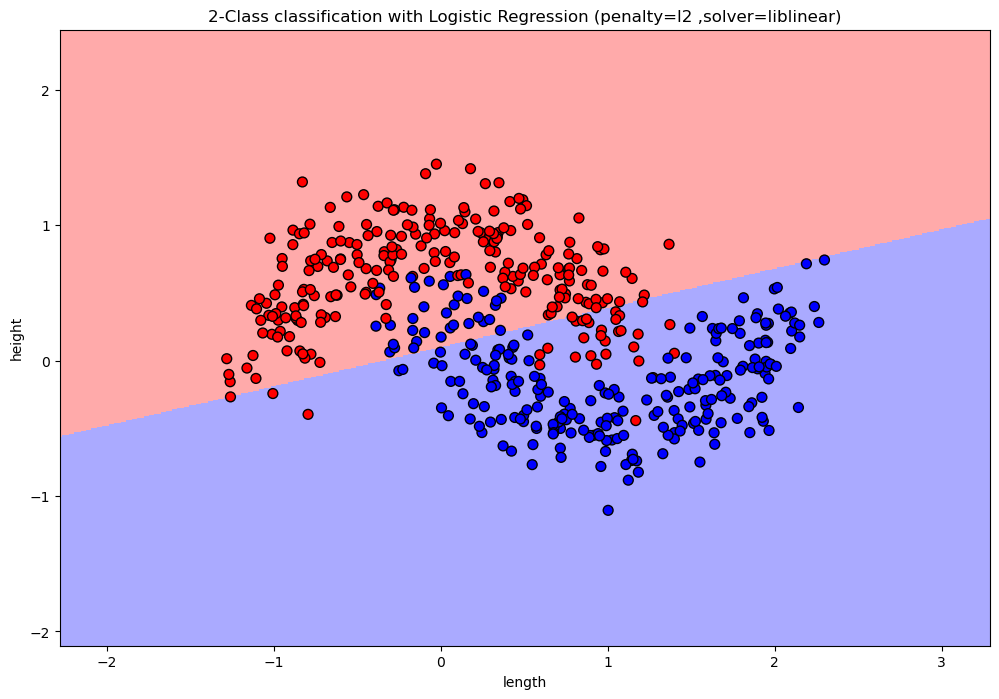

In [16]:
# Put the result into a color plot
plt.figure(3,figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('length')
plt.ylabel('height')
plt.title("2-Class classification with Logistic Regression (penalty=%s ,solver=%s)" % (pen, solv))    
plt.show()

6. Set the plot limits to match the mesh grid, add legend, labels, and create a title that includes the model parameters.

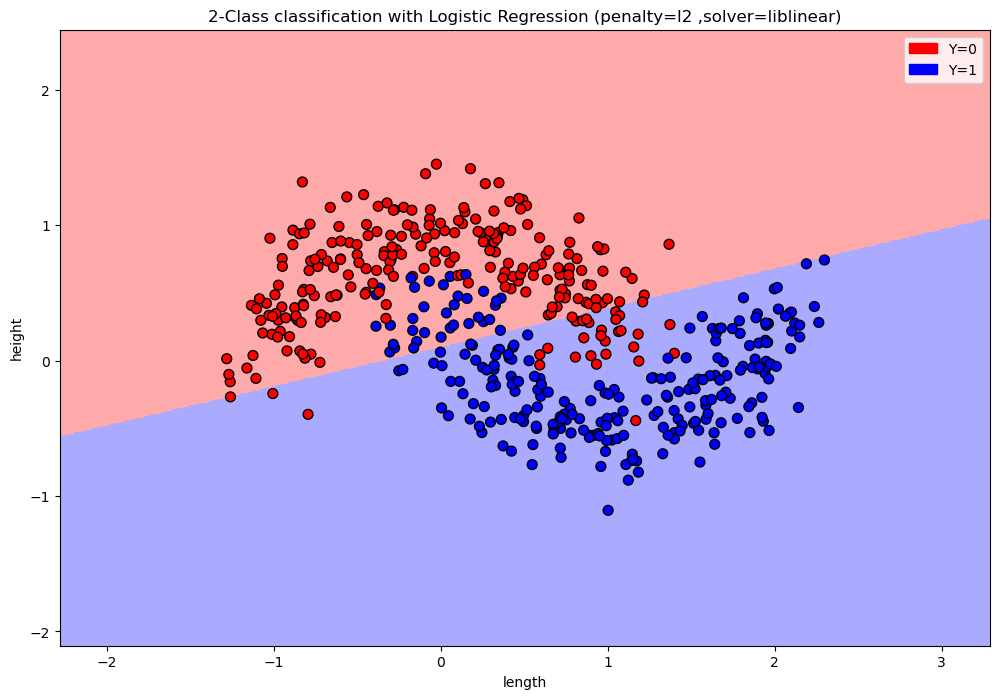

In [17]:
# Put the result into a color plot
plt.figure(3,figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Labels, legend, title
patch0 = mpatches.Patch(color='#FF0000', label='Y=0')
patch1 = mpatches.Patch(color='#0000FF', label='Y=1')
plt.legend(handles=[patch0, patch1])

plt.xlabel('length')
plt.ylabel('height')
plt.title("2-Class classification with Logistic Regression (penalty=%s ,solver=%s)" % (pen, solv))    
plt.show()

Full code:

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

pen = 'l2'
solv = 'liblinear'
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary by assigning a color in the color map to each mesh point.
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure(3,figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Labels, legend, title
patch0 = mpatches.Patch(color='#FF0000', label='Y=0')
patch1 = mpatches.Patch(color='#0000FF', label='Y=1')
plt.legend(handles=[patch0, patch1])

plt.xlabel('length')
plt.ylabel('height')
plt.title("2-Class classification with Logistic Regression (penalty=%s ,solver=%s)" % (pen, solv))    
plt.show()

Logistic regression is a linear classifier. Hence the two classes can not be separated. (obige Grafik als Veranschaulichung)

### **E)** 
Which method could be better suited for this task? Try to improve on the error rate.

In [18]:
from sklearn import svm
supvecma = svm.SVC(kernel = 'rbf', C = 3)
model_svm = supvecma.fit(X, y)
print('Error rate:', np.mean(np.not_equal(model_svm.predict(X),y)))

Error rate: 0.03


Plot your classifier again. You only need to exchange the model used for predictions in the code.

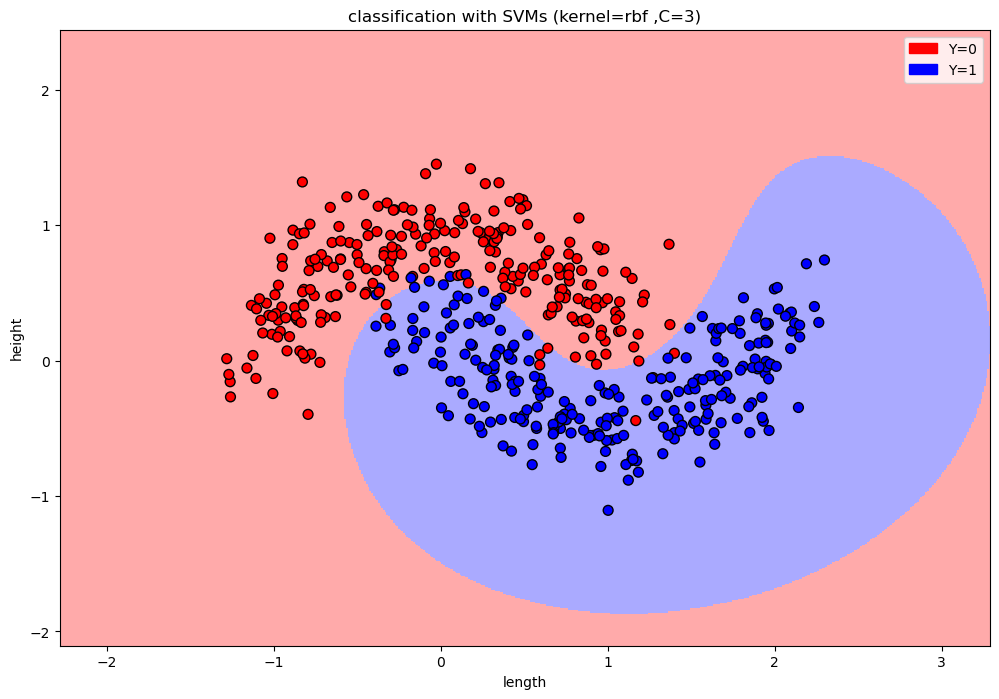

In [19]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary by assigning a color in the color map to each mesh point.
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(3,figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='Y=0')
patch1 = mpatches.Patch(color='#0000FF', label='Y=1')
plt.legend(handles=[patch0, patch1])

plt.xlabel('length')
plt.ylabel('height')
plt.title("classification with SVMs (kernel=rbf ,C=3)" )    
plt.show()